In [ ]:
import requests
import json
import csv
import pandas as pd
import os
import time


from dotenv import load_dotenv

import matplotlib.pyplot as plt
import plotly.express as px


In [4]:
# Importation des modules nécessaires pour le projet

import requests # 'requests' permet d'effectuer des requêtes HTTP (par exemple, pour interroger une API web comme Yelp)

import json # 'json' sert à manipuler les données au format JSON (JavaScript Object Notation), très utilisé pour les échanges de données avec les APIs

import csv # 'csv' permet de lire et d'écrire des fichiers CSV (Comma-Separated Values), pratique pour stocker ou exporter des données tabulaires

import pandas as pd # 'pandas' (sous le nom 'pd') est une bibliothèque puissante pour la manipulation et l'analyse de données sous forme de tableaux (DataFrame)

import os # 'os' permet d'interagir avec le système d'exploitation, notamment pour accéder aux variables d'environnement ou manipuler des fichiers/répertoires

import time # 'time' fournit des fonctions pour gérer le temps, comme faire des pauses dans l'exécution du code (utile pour respecter les limites d'une API)

from dotenv import load_dotenv # 'load_dotenv' du module 'dotenv' permet de charger automatiquement les variables d'environnement définies dans un fichier .env

import matplotlib.pyplot as plt # 'matplotlib.pyplot' (sous le nom 'plt') est utilisé pour créer des graphiques statiques (histogrammes, courbes, etc.)

import plotly.express as px # 'plotly.express' (sous le nom 'px') permet de créer des graphiques interactifs facilement (camemberts, barres, etc.)

In [5]:
### environnement de définition des fonctions
def get_businesses(location, api_key, categories=None, term="restaurants"):
    """
    Cette fonction interroge l'API Yelp pour obtenir une liste d'établissements en fonction des critères spécifiés.
    
    Args:
        location (str) : Lieu où chercher les établissements.
        api_key (str) : Clé d'API Yelp pour authentifier la requête.
        categories (str, optionnel) : Catégories d'établissements à rechercher.
        term (str, optionnel) : Terme de recherche. Par défaut, il s'agit de "restaurants".

    Returns:
        list : Liste de dictionnaires où chaque dictionnaire représente les détails d'un établissement.
    """
    headers = {"Authorization": "Bearer %s" % api_key}
    url = "https://api.yelp.com/v3/businesses/search"
    data = {}
    offset = 0
    while len(data) < 200:
        params = {
            "limit": 50,
            "location": location,
            "term": term,
            "offset": offset,
            "categories": categories,  
        }
        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            businesses = response.json()["businesses"]
            print(f"Received {len(businesses)} businesses from Yelp API.")  
            for business in businesses:
                if business["id"] not in data:
                    data[business["id"]] = business
        elif response.status_code == 400:
            print("400 Bad Request")
            break
        print(f"Currently, {len(data)} unique businesses collected.")  
        offset += 50
    print(f"Total unique businesses collected: {len(data)}.") 
    return list(data.values())  

def get_reviews(business_id, api_key):
    """
    Cette fonction récupère les avis d'un établissement spécifique à partir de l'API Yelp.
    
    Args:
        business_id (str) : ID de l'établissement pour lequel récupérer les avis.
        api_key (str) : Clé d'API Yelp pour authentifier la requête.
        
    Returns:
        list : Liste de dictionnaires où chaque dictionnaire représente un avis pour l'établissement.
    """
    headers = {"Authorization": "Bearer %s" % api_key}
    url = f"https://api.yelp.com/v3/businesses/{business_id}/reviews"
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.json()["reviews"]
    except:
        print(f"Failed to get reviews for business id {business_id}")
    return []


def collect_and_write_data(location, api_key, categories):
    """
    Cette fonction collecte les données des établissements et de leurs avis à partir de l'API Yelp 
    et les écrit dans un fichier CSV.
    
    Args:
        location (str) : Lieu où chercher les établissements.
        api_key (str) : Clé d'API Yelp pour authentifier la requête.
        categories (str) : Catégories d'établissements à rechercher.
    """
    businesses = get_businesses(location, api_key, categories)
    with open("yelp_data.csv", "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(
            [
                "business_id",
                "name",
                "rating",
                "review_count",
                "category",
                "address",
                "city",
                "zip_code",
                "review_text",
                "review_rating",
            ]
        )
        for business in businesses:
            business_id = business["id"]
            reviews = get_reviews(business_id, api_key)
            for review in reviews:
                writer.writerow(
                    [
                        business_id,
                        business["name"],
                        business["rating"],
                        business["review_count"],
                        ", ".join([cat["title"] for cat in business["categories"]]),
                        business["location"]["address1"],
                        business["location"]["city"],
                        business["location"]["zip_code"],
                        review["text"],
                        review["rating"],
                    ]
                )            

In [6]:
# Charger les variables d'environnement depuis le fichier .env
# Cela cherchera un fichier .env dans le répertoire courant ou les répertoires parents.
load_dotenv()

# Accéder à votre clé API
api_key = os.getenv('MY_API_KEY')

if api_key:
    print(f"Ma clé API est : {api_key}")
    # Ici, vous pouvez utiliser api_key pour configurer vos appels d'API
else:
    print("La variable d'environnement MY_API_KEY n'a pas été trouvée.")
    print("Assurez-vous d'avoir un fichier .env avec MY_API_KEY défini,")
    print("ou que la variable est définie dans l'environnement de votre système.")

# Exemple d'utilisation (fictif)
# import requests
# headers = {'Authorization': f'Bearer {api_key}'}
# response = requests.get('https://api.example.com/data', headers=headers)
# print(response.json())


python-dotenv could not parse statement starting at line 2


Ma clé API est : eWtpdzo8O7Of1Qhnq7Of6PfdsCno6fnJFq-36UY9jm-LYbCLcT84vVxQu7jxT6jXw61V-h7SPOv4t-z4W6hehMMQkfFXZye2FHaBTP7KdUSTsAHwji1fes8UZlsraHYx


In [ ]:
Il est possible de filtrer la recherche de restaurants selon la ville et, de façon optionnelle, la catégorie de l'établissement. 
La liste des catégories disponibles se trouve à l'adresse suivante : https://docs.developer.yelp.com/docs/resources-categories

Valeur de la variable d'environnement MY_API_KEY :  
eWtpdzo8O7Of1Qhnq7Of6PfdsCno6fnJFq-36UY9jm-LYbCLcT84vVxQu7jxT6jXw61V-h7SPOv4t-z4W6hehMMQkfFXZye2FHaBTP7KdUSTsAHwji1fes8UZlsraHYx

Client ID: 
c4_dvyIvEkkAthQE_BhzlQ

import requests

url = "https://api.yelp.com/v3/businesses/business_id_or_alias/reviews?limit=20&sort_by=yelp_sort"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

In [ ]:
api_key = os.getenv("MY_API_KEY")
location = "Paris"
categories = "french"
collect_and_write_data(location, api_key, categories)

Received 50 businesses from Yelp API.
Currently, 50 unique businesses collected.
Received 50 businesses from Yelp API.
Currently, 100 unique businesses collected.
Received 50 businesses from Yelp API.
Currently, 150 unique businesses collected.
Received 50 businesses from Yelp API.
Currently, 200 unique businesses collected.
Total unique businesses collected: 200.


In [16]:
import requests
import csv
import os
import time

def get_businesses(location, api_key, categories=None, term="restaurants", max_results=200):
    """
    Interroge l'API Yelp pour obtenir une liste d'établissements selon les critères.
    """
    headers = {"Authorization": f"Bearer {api_key}"}
    url = "https://api.yelp.com/v3/businesses/search"
    businesses = []
    seen_ids = set()
    offset = 0
    limit = 50

    while len(businesses) < max_results:
        params = {
            "limit": limit,
            "location": location,
            "term": term,
            "offset": offset,
        }
        if categories:
            params["categories"] = categories
        try:
            response = requests.get(url, headers=headers, params=params, timeout=10)
            if response.status_code == 200:
                batch = response.json().get("businesses", [])
                if not batch:
                    break
                for business in batch:
                    bid = business.get("id")
                    if bid and bid not in seen_ids:
                        businesses.append(business)
                        seen_ids.add(bid)
                if len(batch) < limit:
                    break  # Plus de résultats
            elif response.status_code == 400:
                print("400 Bad Request")
                break
            else:
                print(f"Erreur {response.status_code}: {response.text}")
                break
        except Exception as e:
            print(f"Erreur lors de la requête Yelp: {e}")
            time.sleep(2)
            continue
        offset += limit
        time.sleep(0.5)  # Respecter les limites d'API
    return businesses[:max_results]

def get_reviews(business_id, api_key):
    """
    Récupère les avis d'un établissement spécifique à partir de l'API Yelp.
    """
    headers = {"Authorization": f"Bearer {api_key}"}
    url = f"https://api.yelp.com/v3/businesses/{business_id}/reviews"
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            return response.json().get("reviews", [])
    except Exception as e:
        print(f"Erreur pour les avis {business_id}: {e}")
    return []

def collect_and_write_data(location, api_key, categories, max_results=200):
    """
    Collecte les données des établissements et de leurs avis, puis écrit dans un CSV.
    """
    businesses = get_businesses(location, api_key, categories, max_results=max_results)
    with open("yelp_data.csv", "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([
            "business_id", "name", "rating", "review_count", "category",
            "address", "city", "zip_code", "review_text", "review_rating"
        ])
        for idx, business in enumerate(businesses, 1):
            business_id = business.get("id")
            reviews = get_reviews(business_id, api_key)
            for review in reviews:
                writer.writerow([
                    business_id,
                    business.get("name", ""),
                    business.get("rating", ""),
                    business.get("review_count", ""),
                    ", ".join([cat.get("title", "") for cat in business.get("categories", [])]),
                    business.get("location", {}).get("address1", ""),
                    business.get("location", {}).get("city", ""),
                    business.get("location", {}).get("zip_code", ""),
                    review.get("text", ""),
                    review.get("rating", ""),
                ])
            # Affichage de progression simple
            if idx % 10 == 0 or idx == len(businesses):
                print(f"{idx}/{len(businesses)} établissements traités.")

# Utilisation
api_key = os.getenv("MY_API_KEY")
location = "Paris"
categories = "french"
collect_and_write_data(location, api_key, categories, max_results=200)

10/200 établissements traités.
20/200 établissements traités.
30/200 établissements traités.
40/200 établissements traités.
50/200 établissements traités.
60/200 établissements traités.
70/200 établissements traités.
80/200 établissements traités.
90/200 établissements traités.
100/200 établissements traités.
110/200 établissements traités.
120/200 établissements traités.
130/200 établissements traités.
140/200 établissements traités.
150/200 établissements traités.
160/200 établissements traités.
170/200 établissements traités.
180/200 établissements traités.
190/200 établissements traités.
200/200 établissements traités.


In [17]:
df = pd.read_csv("yelp_data.csv")

In [18]:
df

,business_id,name,rating,review_count,category,address,city,zip_code,review_text,review_rating
0,-0iLH7iQNYtoURciDpJf6w,Le Comptoir de la Gastronomie,4.5,1410,French,34 rue Montmartre,Paris,75001,I love a restaurant or bar with a great vibe. ...,5
1,-0iLH7iQNYtoURciDpJf6w,Le Comptoir de la Gastronomie,4.5,1410,French,34 rue Montmartre,Paris,75001,Le Comptoir de la Gastronamie is French and li...,4
2,-0iLH7iQNYtoURciDpJf6w,Le Comptoir de la Gastronomie,4.5,1410,French,34 rue Montmartre,Paris,75001,We arrived and were immediately seated and ser...,5
3,-0iLH7iQNYtoURciDpJf6w,Le Comptoir de la Gastronomie,4.5,1410,French,34 rue Montmartre,Paris,75001,"Stopped for a sweet treat late one night, and ...",5
4,-0iLH7iQNYtoURciDpJf6w,Le Comptoir de la Gastronomie,4.5,1410,French,34 rue Montmartre,Paris,75001,Excellent boys server was nice even they are a...,5
...,...,...,...,...,...,...,...,...,...,...
1328,RQ5EPLJC6Y3PagxuNwEpog,Hugo,4.5,43,French,12 rue Papillon,Paris,75009,We ate here on Christmas Eve and had such a wo...,5
1329,RQ5EPLJC6Y3PagxuNwEpog,Hugo,4.5,43,French,12 rue Papillon,Paris,75009,A small but great restaurant. I returned after...,5
1330,RQ5EPLJC6Y3PagxuNwEpog,Hugo,4.5,43,French,12 rue Papillon,Paris,75009,Came here recently while my boyfriend and I we...,4
1331,RQ5EPLJC6Y3PagxuNwEpog,Hugo,4.5,43,French,12 rue Papillon,Paris,75009,After my friend and I RESERVED a table at the ...,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    1333 non-null   object 
 1   name           1333 non-null   object 
 2   rating         1333 non-null   float64
 3   review_count   1333 non-null   int64  
 4   category       1333 non-null   object 
 5   address        1326 non-null   object 
 6   city           1333 non-null   object 
 7   zip_code       1333 non-null   int64  
 8   review_text    1333 non-null   object 
 9   review_rating  1333 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 104.3+ KB


In [20]:
df.nunique()

business_id       200
name              197
rating             20
review_count      118
category           63
address           199
city                2
zip_code           21
review_text      1333
review_rating       5
dtype: int64

In [1]:
fig = px.pie(
    df,
    names="rating",
    title="Distribution des notes des restaurants sélectionnés",
    color="rating",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hole=0.4
)
fig.update_traces(textinfo='percent+label', pull=[0.05]*df.rating.nunique())
fig.show()


ModuleNotFoundError: No module named 'plotly'

Text(0.5, 1.0, 'Distribution des notes des restaurants sélectionnés')

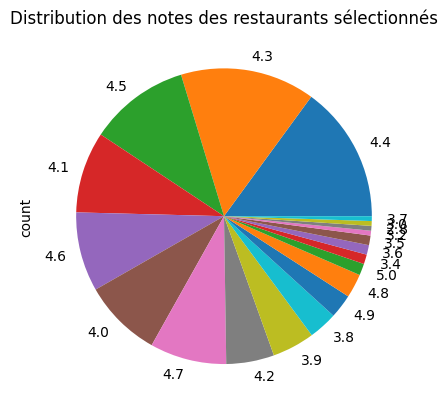

In [14]:
df.rating.value_counts().plot.pie()
plt.title("Distribution des notes des restaurants sélectionnés")